In [26]:
import pandas as pd
import numpy as np
import nltk 
from collections import Counter
from nltk.tokenize import word_tokenize
import seaborn as sns
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import wordcloud


In [39]:
df=pd.read_csv ('dataset.csv')
df.tail(12)

,Unnamed: 0,ID,label,tanggal,judul,narasi,nama file gambar,databersih
4137,4137,95132.0,1,24/08/2018,Ustaz Di Cianjur Dipersekusi dan Dibacok,"Kalian terlalu sibuk posting tentang Pilpres, ...",95132.jpg,sibuk posting pilpres sibuk posting 2019 pre...
4138,4138,840603.0,1,24/08/2018,Website Surveyfadlizon.com Milik Waketum Gerindra,Kalau ada surveyfadlizon.com itu bukan punya ...,840603.jpg,surveyfadlizon com pusat hoax nasional wakil k...
4139,4139,316308.0,0,24/08/2018,: BBKSDA Jatim Mengklarifikasi Bahwa Wisata Al...,Menyusul beredarnya surat edaran rencana penut...,316308.jpg,susul edar surat edar rencana tutup kawah ijen...
4140,4140,365467.0,0,24/08/2018,DIRUMORKAN PUNYA ATURAN BARU PEMBATASAN WAKTU ...,"Kepala Humas BPJS Kesehatan, M. Iqbal Anas Ma...",365467.jpg,kepala humas bpjs sehat iqbal anas maruf uji l...
4141,4141,332690.0,1,24/08/2018,DAFTAR NAMA HONORER YANG LOLOS SELEKSI CPNS 2018,Akhirnya pak bu inilah yang kita tunggu sekia...,332690.jpg,sekian
4142,4142,496530.0,1,24/08/2018,Akun Twitter @LawanPolitikJKW adalah Milik Fer...,Beberapa hari terakhir ini telah beredar luas ...,496530.jpg,edar luas capture buah twitter foto nama sah u...
4143,4143,832401.0,0,24/08/2018,Pollycarpus Bantah Jadi Kader Partai Berkarya,Setelah lama dikabarkan telah menjadi kader Pa...,832401.jpg,kabar kader partai karya pollycarpus budihari ...
4144,4144,160657.0,1,24/08/2018,Omongan Bin Masak Ngak DIperhatikan,Omongan Bin Masak Ngak DIperhatikan.. Ngeri N...,160657.jpg,omong bin masak ngak perhati ngeri ngeri sedap...
4145,4145,504715.0,1,24/08/2018,Beginilah Caranya China Menghancurkan Dunia,Disinformasi yang pernah beberapa kali diedark...,504715.jpg,disinformasi edar pil china turki
4146,4146,480136.0,0,24/08/2018,Bappenas Bantah Tudingan Sandiaga Uno yang Seb...,"Itu sama sekali tidak benar, mereka (BPS) pun...",480136.jpg,bps undang independensi menteri rencana bangun...


In [40]:
df.dtypes

Unnamed: 0            int64
ID                  float64
label                 int64
tanggal              object
judul                object
narasi               object
nama file gambar     object
databersih           object
dtype: object

In [24]:
df_pos = df[df['label']==0]['databersih']
df_pos.to_csv('nonhoax.csv', encoding='utf8', index = False)
df_neg = df[df['label']==1]['databersih']
df_neg.to_csv('hoax.csv', encoding='utf8', index = False)

C:\Users\tamu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\tamu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


Proporsi label


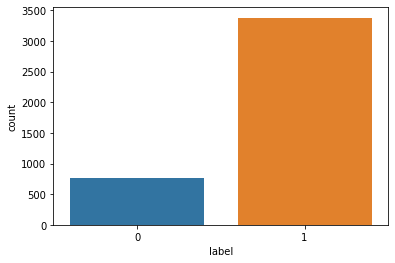

In [41]:
print("Proporsi label")
ax = sns.countplot(df['label'])

In [42]:
df['label'].value_counts()

1    3380
0     769
Name: label, dtype: int64

In [44]:
df['Tahun'] = pd.to_datetime(df['tanggal'])

datesen_counts = (df.groupby(df['tanggal'].dt.year)['label']
                .value_counts()
                .rename('Df')
                .reset_index()
                .sort_values('tanggal'))
print(datesen_counts)

AttributeError: Can only use .dt accessor with datetimelike values